# **Semana 4 Introducción a la programación con Python**


## Visualización de Datos: Exploración Inicial

Antes de aprender a usar librerías como **Matplotlib** y **Seaborn**, es útil conocer los **tipos de gráficos** que existen y **cuándo usarlos**. Esto te permitirá elegir la mejor herramienta para visualizar tus datos, dependiendo del tipo de variable y del objetivo del análisis.

En esta primera parte, usaremos directamente pandas y Matplotlib para crear distintos tipos de gráficos y reflexionar sobre sus usos.


In [1]:
# Importamos las librerías necesarias:
# - pandas: para cargar y manipular datos
# - matplotlib.pyplot: para crear visualizaciones básicas
# - seaborn: para visualizaciones estadísticas más avanzadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Esta línea mágica permite que los gráficos de Matplotlib se muestren directamente dentro del notebook.
# Aunque en Google Colab suele estar activada por defecto, es buena práctica incluirla.
%matplotlib inline

# Cargamos el conjunto de datos desde una URL pública.
# Este dataset contiene información sobre consumo de combustible y emisiones de CO2
# para vehículos ligeros vendidos en Canadá.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"




## Veamos algo descriptivo ##

In [2]:
# Usamos pandas para leer el archivo CSV y almacenarlo en un DataFrame llamado df
df = pd.read_csv(url)

# Mostramos las primeras 5 filas del DataFrame para tener una idea general del contenido
df.head()

# Mostramos un resumen estadístico de las variables numéricas del DataFrame
df.describe()
# El método describe() genera un resumen estadístico de las columnas numéricas del conjunto de datos. Esto incluye:
# count: cuántos valores no nulos hay por columna.
# mean: el promedio de los valores.
# std: la desviación estándar (mide cuán dispersos están los datos respecto del promedio).
# min y max: el valor mínimo y máximo encontrados.
# 25%, 50%, 75%: los percentiles (cuartiles), útiles para entender la distribución de los datos.
# Es muy útil para tener una primera visión general del conjunto de datos,
# identificar posibles valores extremos y entender la escala de las variables antes de analizarlas más a fondo.


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



## Comprendiendo el conjunto de datos: FuelConsumption.csv

Utilizaremos un conjunto de datos llamado `FuelConsumption.csv`, que contiene información sobre el consumo de combustible y emisiones de dióxido de carbono (CO2) de vehículos livianos nuevos disponibles para la venta al por menor en Canadá.

### Columnas del conjunto de datos:

- **MODEL YEAR**: Año del modelo, por ejemplo, 2014
- **MAKE**: Marca del vehículo, por ejemplo, VOLVO
- **MODEL**: Modelo del vehículo, por ejemplo, S60 AWD
- **VEHICLE CLASS**: Clase del vehículo, por ejemplo, COMPACT
- **ENGINE SIZE**: Tamaño del motor en litros, por ejemplo, 3.0
- **CYLINDERS**: Número de cilindros, por ejemplo, 6
- **TRANSMISSION**: Tipo de transmisión, por ejemplo, AS6
- **FUEL TYPE**: Tipo de combustible, por ejemplo, Z
- **FUEL CONSUMPTION in CITY (L/100 km)**: Consumo de combustible en ciudad, por ejemplo, 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)**: Consumo de combustible en carretera, por ejemplo, 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)**: Consumo combinado de combustible, por ejemplo, 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)**: Millas por galón, por ejemplo, 25
- **CO2 EMISSIONS (g/km)**: Emisiones de CO2, por ejemplo, 182

---

### Objetivo:

A lo largo del cuaderno trabajaremos con visualizaciones como paso previo a un modelo de regresión lineal.

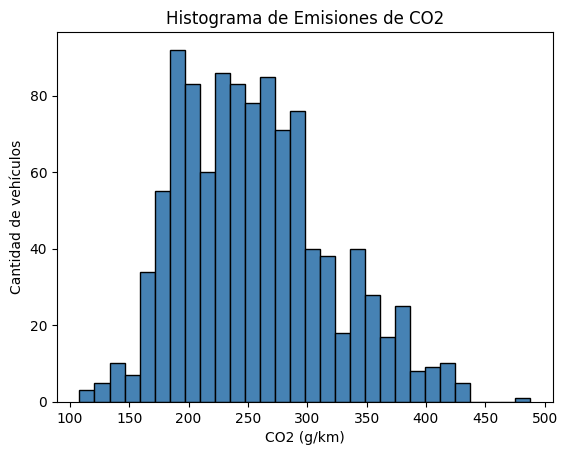

In [7]:
# Creamos un histograma de la variable CO2EMISSIONS, que muestra la distribución de las emisiones de CO2
plt.hist(df['CO2EMISSIONS'], bins=30, color='steelblue', edgecolor='black')

# Título del gráfico
plt.title("Histograma de Emisiones de CO2")

# Etiqueta del eje X (valores de emisiones en gramos por kilómetro)
plt.xlabel("CO2 (g/km)")

# Etiqueta del eje Y (cantidad de vehículos con ese rango de emisiones)
plt.ylabel("Cantidad de vehículos")

# Mostramos el gráfico
plt.show()

# Este histograma nos permite ver cómo se distribuyen las emisiones de CO₂ en el conjunto de datos.
# El parámetro bins=30 divide el rango de valores en 30 grupos (o barras).
# Los ejes indican cuántos vehículos caen en cada rango de emisiones.
# Nos ayuda a identificar si la mayoría de los vehículos emiten poco, mucho o están distribuidos uniformemente.

In [8]:
# Seleccionamos solo algunas columnas del DataFrame original para enfocarnos en las variables que más nos interesan
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

# Mostramos una muestra aleatoria de 9 filas del nuevo DataFrame cdf
cdf.sample(9)

# La variable cdf contiene un subconjunto del DataFrame original df,
# en el que seleccionamos solo las columnas que podrían tener una relación directa con las emisiones de CO2:
# ENGINESIZE: tamaño del motor (en litros).
# CYLINDERS: número de cilindros del motor.
# FUELCONSUMPTION_COMB: consumo de combustible combinado (ciudad y carretera).
# CO2EMISSIONS: emisiones de dióxido de carbono (g/km).
# sample(9) permite ver una selección aleatoria de 9 registros del DataFrame cdf.
# Esto es útil para explorar diferentes casos del conjunto de datos sin mostrarlo todo.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1013,1.5,4,7.1,163
142,1.4,4,8.5,196
349,6.8,10,21.2,488
32,3.0,6,8.4,227
607,2.0,4,8.4,193
508,3.3,6,11.2,258
897,2.7,6,9.2,212
951,2.0,4,7.8,179
667,3.5,6,10.6,244



## ¿Por qué usar Matplotlib o Seaborn? Comparación, ventajas y contexto

Cuando trabajamos con datos en Python, **visualizarlos correctamente es una parte esencial del análisis exploratorio**. Las dos librerías más comunes para esto son **Matplotlib** y **Seaborn**. Aunque ambas se usan para crear gráficos, tienen características distintas que las hacen más apropiadas para diferentes situaciones.

### 📊 Matplotlib
- Es la **librería base** para visualización en Python.
- Proporciona **control completo sobre cada elemento del gráfico**.
- Ideal cuando necesitas crear gráficos altamente personalizados.
- Tiene una **sintaxis más detallada** y puede ser menos intuitiva para principiantes.

**Ventajas:**
- Muy flexible.
- Compatible con muchas otras librerías.

**Desventajas:**
- Mayor cantidad de código para tareas simples.
- Estética básica por defecto (aunque se puede personalizar).

### 📈 Seaborn
- Construida sobre Matplotlib, ofrece una **sintaxis más sencilla**.
- Viene con **estilos visuales elegantes y colores automáticos**.
- Ideal para **análisis estadístico rápido y limpio**.

**Ventajas:**
- Menos líneas de código para gráficos complejos.
- Muy buena para visualizaciones estadísticas (distribuciones, correlaciones, mapas de calor).

**Desventajas:**
- Menos flexible si quieres personalizar cada detalle del gráfico.
- Depende de Matplotlib, así que no la reemplaza completamente.

### 🤔 ¿Cuál deberías usar?
- Si estás comenzando y quieres ver relaciones entre variables rápidamente: **Seaborn**.
- Si necesitas controlar la posición exacta, el color, estilo o ejes personalizados: **Matplotlib**.
- En general, se pueden usar **complementariamente**, como haremos en este cuaderno.


In [ ]:
# Crear histogramas de algunas variables para observar su distribución
# Esto nos permite conocer la forma de los datos antes de aplicar modelos
features = ['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']
df[features].hist(figsize=(10,8))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

In [ ]:
# Importamos la librería de visualización matplotlib
import matplotlib.pyplot as plt

# Creamos un gráfico de dispersión (scatter plot) con las siguientes configuraciones:
# - df.FUELCONSUMPTION_COMB: valores del eje X (consumo combinado de combustible)
# - df.CO2EMISSIONS: valores del eje Y (emisiones de CO2)
# - color='blue': define el color de los puntos en el gráfico
# - alpha=0.5: define la opacidad de los puntos (0 totalmente transparente, 1 totalmente opaco)
#   Usar una alpha más baja permite ver mejor la concentración de puntos cuando hay muchos datos.
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue', alpha=0.5)

# Etiquetamos el eje X para indicar que representa el consumo de combustible en condiciones combinadas.
plt.xlabel('Consumo combinado (L/100 km)')

# Etiquetamos el eje Y para indicar que representa las emisiones de dióxido de carbono por kilómetro.
plt.ylabel('Emisiones de CO2 (g/km)')

# Agregamos un título descriptivo para que el gráfico tenga contexto sin necesidad de explicación adicional.
plt.title('Relación entre Consumo y Emisiones')

# Agregamos una cuadrícula de fondo para facilitar la lectura de los valores de los ejes y mejorar la interpretación.
plt.grid(True)

# Finalmente, renderizamos y mostramos el gráfico en pantalla.
plt.show()



In [ ]:
# Usamos seaborn para crear un gráfico de pares (pairplot), que genera una matriz de gráficos
# donde cada celda representa una comparación entre dos variables numéricas.

# Este tipo de visualización es útil para:
# - Detectar relaciones lineales o no lineales entre variables.
# - Identificar posibles correlaciones visuales.
# - Observar patrones, agrupamientos o valores atípicos.
# - Tener una visión general del comportamiento conjunto de todas las variables numéricas seleccionadas.

# df[features] contiene las columnas que seleccionamos previamente como relevantes.
# kind='scatter' indica que queremos usar diagramas de dispersión en cada celda de comparación.
# plot_kws={'alpha': 0.4} configura la transparencia de los puntos para que, cuando hay muchos puntos superpuestos,
# sea más fácil distinguir las áreas de mayor densidad (zonas con más datos agrupados).

sns.pairplot(df[features], kind='scatter', plot_kws={'alpha': 0.4})

# Agregamos un título general al conjunto de gráficos con plt.suptitle().
# El argumento y=1.02 eleva un poco el título por encima de la figura para que no se sobreponga con los gráficos.
plt.suptitle('Relaciones entre Variables', y=1.02)

# Finalmente, mostramos en pantalla la matriz de gráficos generada.
plt.show()

# Si vemos una tendencia clara (por ejemplo, una nube de puntos con pendiente ascendente),
# eso sugiere una posible correlación positiva entre esas variables. E
# Esto es muy útil antes de aplicar modelos como la regresión.


In [ ]:
# Usamos seaborn para crear un gráfico de dispersión con una línea de regresión lineal ajustada automáticamente.
# Este tipo de gráfico es útil para identificar relaciones lineales entre dos variables numéricas.
# En el eje x colocamos el tamaño del motor (ENGINESIZE) y en el eje y las emisiones de CO2.
# 'scatter_kws' permite ajustar detalles del gráfico de dispersión, en este caso la transparencia de los puntos.
sns.lmplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df, scatter_kws={'alpha': 0.3})

# Agregamos un título descriptivo al gráfico
plt.title('Regresión Lineal entre Tamaño del Motor y Emisiones')

# Mostramos el gráfico
plt.show()


### 2. Gráfico de barras
Se usa para comparar **categorías** o valores agregados.

(En este dataset no hay muchas variables categóricas, así que convertiremos una continua a categórica temporalmente para mostrar un ejemplo).


In [ ]:
# Convertimos el número de cilindros en una variable categórica (texto),
# ya que nos interesa agrupar los datos por categoría y no tratarlos como números continuos.
df['CYLINDERS_CAT'] = df['CYLINDERS'].astype(str)

# Calculamos el promedio de emisiones de CO2 para cada categoría de número de cilindros.
# Esto nos ayuda a entender si los autos con más cilindros tienden a emitir más CO2.
promedios = df.groupby('CYLINDERS_CAT')['CO2EMISSIONS'].mean()

# Usamos Matplotlib para graficar los promedios como un gráfico de barras.
# Cada barra representa una categoría distinta de cilindros y su respectivo promedio de emisión.
promedios.plot(kind='bar', color='orange', edgecolor='black')

# Agregamos un título al gráfico
plt.title("Emisión Promedio según Nº de Cilindros")

# Etiquetamos los ejes X e Y
plt.xlabel("Nº de cilindros")
plt.ylabel("CO2 promedio (g/km)")

# Mostramos una cuadrícula para facilitar la lectura del gráfico
plt.grid(True)

# Mostramos el gráfico en pantalla
plt.show()



### 3. Diagrama de dispersión
Útil para observar **relaciones entre dos variables numéricas**.


In [ ]:
# Creamos un gráfico de dispersión (scatter plot) para visualizar la relación entre el consumo de combustible en ciudad
# y las emisiones de CO2. Cada punto representa un vehículo.
plt.scatter(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'], alpha=0.5)

# Establecemos el título del gráfico
plt.title("Consumo en ciudad vs Emisiones de CO2")

# Etiquetamos el eje X con la variable de consumo de combustible en ciudad (litros cada 100 km)
plt.xlabel("Consumo (L/100km) en ciudad")

# Etiquetamos el eje Y con la variable de emisiones de CO2 en gramos por kilómetro
plt.ylabel("CO2 (g/km)")

# Activamos la cuadrícula para facilitar la lectura visual de las relaciones entre los valores
plt.grid(True)

# Mostramos el gráfico en pantalla
plt.show()


### 4. Boxplot (diagrama de caja)
Ideal para visualizar la **distribución y detectar valores atípicos**.


In [ ]:
# Utilizamos Seaborn para crear un gráfico de caja (boxplot), una herramienta muy útil para analizar
# la distribución de una variable numérica (en este caso, CO2EMISSIONS) agrupada por una variable categórica (número de cilindros).

# ¿Qué nos muestra este gráfico?
# - La línea dentro de cada caja representa la mediana de las emisiones para ese número de cilindros.
# - Los bordes de la caja muestran el primer y tercer cuartil (Q1 y Q3), es decir, donde se concentra el 50% central de los datos.
# - Las "bigotes" (líneas que salen de la caja) representan la extensión de los datos sin considerar los valores atípicos.
# - Los puntos que aparecen fuera de los bigotes se consideran outliers o valores atípicos.

# Para evitar advertencias de futuras versiones de Seaborn, especificamos explícitamente la variable que define el color (hue).
# En este caso, usamos la misma variable categórica 'CYLINDERS_CAT' tanto en 'x' como en 'hue'.
# Además, desactivamos la leyenda ya que el eje X ya indica las categorías.

sns.boxplot(
    x='CYLINDERS_CAT',           # Variable categórica en el eje X (convertida a string)
    y='CO2EMISSIONS',            # Variable numérica en el eje Y
    hue='CYLINDERS_CAT',         # Indicamos que la coloración se basa también en los cilindros
    data=df,                     # Dataset que contiene los datos
    palette="Set2",              # Paleta de colores amigable
    legend=False                 # Desactivamos la leyenda para evitar redundancia
)

# Título del gráfico para indicar claramente lo que se está visualizando
plt.title("Distribución de Emisiones por Nº de Cilindros")

# Etiqueta del eje X que representa las categorías de cilindros
plt.xlabel("Nº de cilindros")

# Etiqueta del eje Y que indica el valor numérico de las emisiones
plt.ylabel("CO2 (g/km)")

# Mostrar el gráfico en pantalla
plt.show()



## Reflexión: ¿Qué tipo de gráfico usar?

| Tipo de gráfico | ¿Cuándo usarlo? |
|-----------------|-----------------|
| Histograma | Para ver cómo se distribuye una variable numérica |
| Barras | Para comparar categorías |
| Dispersión | Para analizar relaciones entre dos variables numéricas |
| Boxplot | Para ver rangos, medianas y valores extremos en una variable |

Ahora que sabes qué tipos de gráficos existen, tiene sentido aprender **cómo generarlos usando librerías específicas**.



---

## Librerías para Visualización: Matplotlib y Seaborn

Ahora que conoces los tipos de gráficos y sus usos, aprenderemos a crearlos de forma más profesional y flexible con **Matplotlib** y **Seaborn**.



## Parte 1: Visualización con Matplotlib

**Matplotlib** es la librería más utilizada para crear gráficos en Python. Aunque es más básica que Seaborn, ofrece un control muy detallado sobre cada elemento de los gráficos.

### 1.1 Visualización de una variable

Vamos a ver cómo se comporta la variable `CO2EMISSIONS`, es decir, la cantidad de dióxido de carbono que emite un vehículo por kilómetro.


In [ ]:
# Creamos un histograma para ver cómo se distribuyen las emisiones de CO2 entre los vehículos

# Usamos la función hist() de matplotlib para graficar los datos de la columna 'CO2EMISSIONS'
# 'bins=30' divide los valores en 30 rangos o intervalos
# 'color' define el color de las barras y 'edgecolor' el color del borde de cada barra
plt.hist(df['CO2EMISSIONS'], bins=30, color='teal', edgecolor='black')

# Título del gráfico
plt.title("Distribución de Emisiones de CO2")

# Etiqueta del eje X: muestra los valores de CO2 emitido
plt.xlabel("CO2 emitido (g/km)")

# Etiqueta del eje Y: muestra la cantidad de vehículos que tienen ese nivel de emisión
plt.ylabel("Cantidad de vehículos")

# Agrega una cuadrícula para facilitar la lectura del gráfico
plt.grid(True)

# Muestra el gráfico en pantalla
plt.show()

# Este gráfico es útil para ver si las emisiones de CO₂ están concentradas en un rango específico
# o si están muy dispersas.
# Nos da una primera idea del comportamiento general de los datos antes de aplicar modelos más complejos.



### 1.2 Gráfico de dispersión: relación entre variables

In [ ]:
# Creamos un diagrama de dispersión (scatter plot) para analizar la relación entre el tamaño del motor y las emisiones de CO2

# Usamos 'ENGINESIZE' como eje X (tamaño del motor en litros)
# Usamos 'CO2EMISSIONS' como eje Y (emisiones de CO2 en gramos por kilómetro)
# 'alpha=0.5' hace los puntos semi-transparentes para facilitar la visualización cuando hay muchos datos
# 'color' define el color de los puntos en el gráfico
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], alpha=0.5, color='darkorange')

# Título del gráfico
plt.title("Relación entre tamaño del motor y emisiones de CO2")

# Etiqueta del eje X
plt.xlabel("Tamaño del motor (L)")

# Etiqueta del eje Y
plt.ylabel("Emisiones de CO2 (g/km)")

# Mostrar una cuadrícula para facilitar la lectura del gráfico
plt.grid(True)

# Mostrar el gráfico en pantalla
plt.show()

# Este gráfico nos ayuda a ver si existe una relación lineal entre el tamaño del motor y las emisiones.
# A simple vista, si los puntos siguen una línea ascendente, podríamos inferir que
# motores más grandes tienden a emitir más CO₂. Esta visualización es muy útil
# como paso previo a aplicar un modelo de regresión.



## Parte 2: Visualización con Seaborn

**Seaborn** permite crear gráficos estadísticos de forma más simple y estética. Además, agrega funciones que combinan visualización con análisis de datos.

### 2.1 Distribuciones con histograma + KDE


In [ ]:
# Usamos Seaborn para crear un histograma con una curva de densidad (kde=True)
# Esto permite visualizar la distribución de las emisiones de CO2 de forma más suave y detallada

# 'df['CO2EMISSIONS']' es la serie de datos a graficar
# 'kde=True' agrega la curva de densidad que ayuda a ver la forma de la distribución
# 'color' define el color de las barras, y 'edgecolor' agrega bordes a cada barra para mejor visibilidad
sns.histplot(df['CO2EMISSIONS'], kde=True, color='red', edgecolor='black')

# Título del gráfico
plt.title("Distribución de emisiones de CO2 (Seaborn)")

# Etiqueta del eje X
plt.xlabel("CO2 Emissions (g/km)")

# Etiqueta del eje Y
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

# A diferencia de matplotlib, seaborn.histplot() incluye de forma opcional la estimación de densidad (kde),
# lo que permite una interpretación más detallada de la forma de la distribución, ideal para análisis exploratorios.


### 2.2 Diagramas de dispersión con histogramas

In [ ]:

# Analizamos ahora si hay relación entre el consumo en ciudad y las emisiones

sns.jointplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df, alpha=0.5, color="purple")

# Este gráfico combina:
# - Un scatter plot (diagrama de dispersión)
# - Un histograma para cada variable en los márgenes
# Esto nos ayuda a ver tanto la distribución de cada variable como su relación.


### 2.3 Relación de múltiples variables

In [ ]:
# Paso 1: Seleccionamos algunas variables numéricas relevantes para el análisis.
# Estas variables tienen sentido porque están relacionadas entre sí desde una perspectiva de consumo y emisiones.
variables = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']

# Paso 2: Usamos la función pairplot de Seaborn para crear un gráfico de pares (pairplot).
# ¿Qué hace este gráfico?
# - Genera una matriz de gráficos de dispersión (scatterplots) que compara cada variable con todas las otras.
# - Por ejemplo: crea un gráfico entre ENGINE SIZE y CYLINDERS, otro entre ENGINE SIZE y CO2EMISSIONS, y así sucesivamente.
# - Además, en la diagonal muestra un histograma de cada variable, para entender su distribución individual.
# El parámetro 'alpha=0.4' hace que los puntos sean parcialmente transparentes,
# lo cual facilita la visualización cuando hay muchos datos sobrepuestos.

sns.pairplot(df[variables], kind='scatter', plot_kws={'alpha': 0.4})

# Paso 3: Agregamos un título general para todo el conjunto de gráficos.
# El parámetro 'y' ajusta la posición vertical del título para que no tape ningún gráfico.
plt.suptitle("Relación entre variables", y=1.02)

# Paso 4: Mostramos el gráfico completo
plt.show()


### 2.4 Correlación entre variables

In [ ]:
# Paso 1: Calculamos y visualizamos la matriz de correlación.
# ¿Qué es una correlación?
# Es una medida estadística que indica la fuerza y la dirección de la relación lineal entre dos variables numéricas.

# - El valor de la correlación varía entre -1 y 1:
#   + 1   → correlación positiva perfecta: cuando una variable sube, la otra también sube en la misma proporción.
#   - 1   → correlación negativa perfecta: cuando una variable sube, la otra baja en la misma proporción.
#     0   → no hay correlación lineal entre las variables.

# Paso 2: Establecemos el tamaño de la figura para que se vea bien
plt.figure(figsize=(8, 6))

# Paso 3: Usamos un mapa de calor (heatmap) de Seaborn para representar la matriz de correlación.
# - `annot=True` muestra los valores numéricos dentro de cada celda.
# - `cmap='coolwarm'` es una paleta de colores que va del azul (negativo) al rojo (positivo).
# - `fmt=".2f"` limita los números a dos decimales.
sns.heatmap(df[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Paso 4: Agregamos un título al gráfico
plt.title("Matriz de correlación entre variables")

# Paso 5: Mostramos el gráfico
plt.show()

# Por qué es importante analizar la matriz de correlación?
# Permite identificar relaciones fuertes entre variables, lo cual es muy útil en machine learning para:
# Seleccionar variables que tienen mayor poder predictivo (por ejemplo, ENGINESIZE está muy correlacionada con CO2EMISSIONS).
# Detectar variables redundantes (por ejemplo, si dos variables están muy correlacionadas, podrían aportar información similar).
# Es una excelente herramienta de análisis exploratorio de datos (EDA) antes de construir cualquier modelo.



## 🧠 Desafío Final: Exploración Visual de Datos de E-Commerce

Ahora que ya sabes cómo utilizar `matplotlib` y `seaborn` para visualizar datos y explorar relaciones entre variables, te proponemos este desafío.

### 📦 Dataset
Trabajaremos con un conjunto de datos real sobre clientes de comercio electrónico y su comportamiento en diferentes plataformas (sitio web, app móvil, etc.).

**Acceso al dataset:**  
[https://www.kaggle.com/datasets/iyadavvaibhav/ecommerce-customer-device-usage](https://www.kaggle.com/datasets/iyadavvaibhav/ecommerce-customer-device-usage)

### 🎯 Objetivo
Explora visualmente este conjunto de datos y responde las siguientes preguntas usando gráficos con `matplotlib` y `seaborn`:

1. ¿Qué variables podrían estar más relacionadas con el gasto anual de los clientes (`Yearly Amount Spent`)?
2. ¿Existen diferencias visibles entre los usuarios que usan más la App vs. el Website?
3. ¿Qué tipo de gráfico resulta más útil para observar correlaciones entre tiempo de uso y gasto?
4. ¿Cómo se distribuyen los datos para cada variable numérica? ¿Existen valores extremos?
5. ¿Puedes identificar visualmente una posible relación lineal entre alguna variable y el gasto anual?

### 🧰 Instrucciones
- Carga los datos y explora su estructura.
- Selecciona un subconjunto de variables que te parezcan relevantes.
- Aplica gráficos de dispersión, diagramas de caja, mapas de calor, etc.
- Comenta cada paso que realices como lo hemos hecho en este notebook.


In [ ]:
# Importar el dataset
df = pd.read_csv("Ecommerce Customers.csv")
# ¿Cómo podemos ver información del dataframe?